In [2]:
import pandas
import random
import numpy as np
from matplotlib import pyplot as plt

% matplotlib notebook

In [3]:
data = pandas.read_csv('WF.csv')

In [4]:
print data.head()
prices = []
for i in np.arange(len(data['price'])):
    prices.append(data['price'][i])
    
#prices = prices[:]

      price
0  119.5588
1  120.9857
2  121.5020
3  119.9849
4  115.6292


<IPython.core.display.Javascript object>


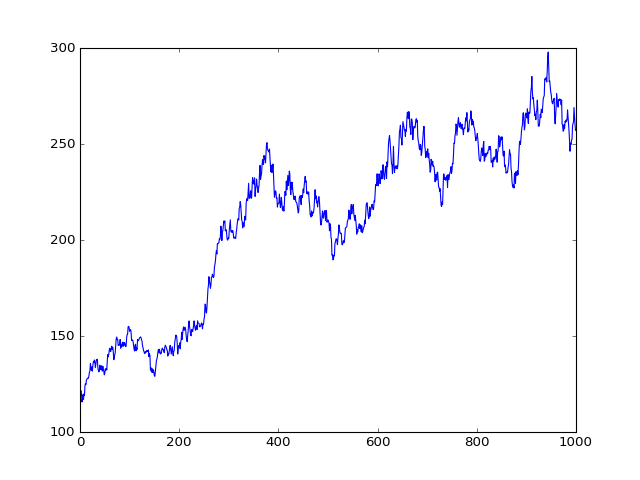

In [5]:
plt.figure('prices')
plt.plot(np.arange(len(prices)), prices)
plt.show()

<IPython.core.display.Javascript object>


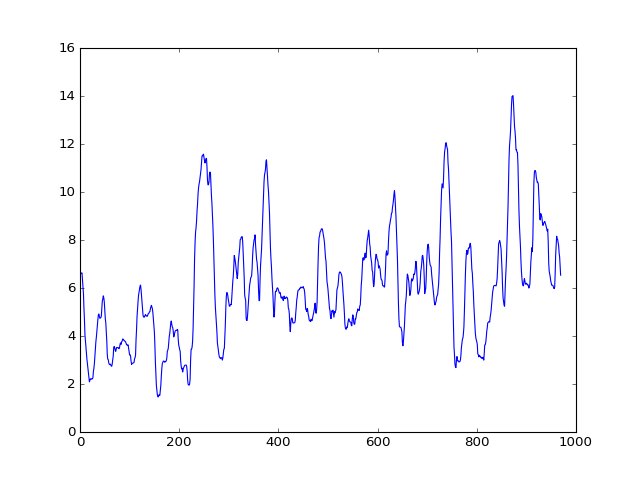

In [6]:
#проверка на гетероскедастичность
stds = []
length = 30
for i in np.arange(len(prices)-length):
    stds.append(np.std(prices[i:i+length]))
    
plt.figure('stds')
plt.plot(np.arange(len(stds)), stds)
plt.show()

0.137722322322
3.11978629235


<IPython.core.display.Javascript object>


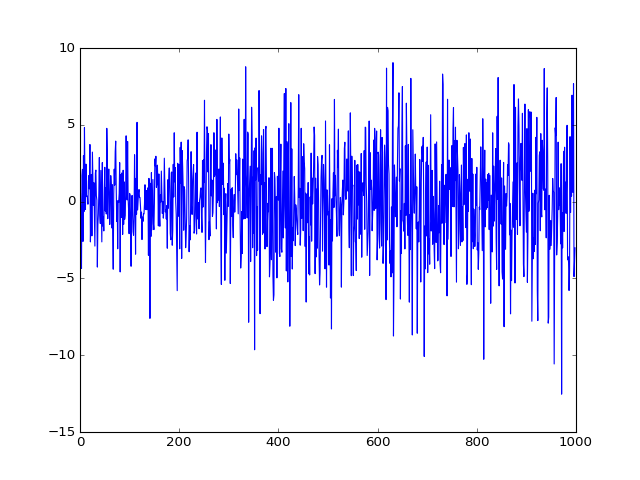

In [7]:
# выдиференцированный ряд
# ОН стационарен по критерию дики фулера
prices_der = np.array([prices[i] - prices[i-1] for i in np.arange(1, len(prices))])
print np.mean(prices_der)
print np.std(prices_der)
plt.figure('prices_der')
plt.plot(np.arange(len(prices_der)), prices_der)
plt.show()

<IPython.core.display.Javascript object>


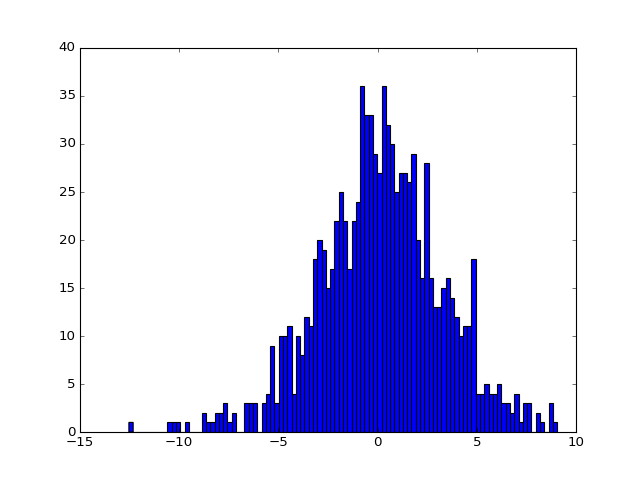

In [8]:
# а распределение значений даже походит на нормальное, однако тест харке-бера не пройдет
plt.figure('der_hist')
plt.hist(prices_der, bins=100)
plt.show()

<IPython.core.display.Javascript object>


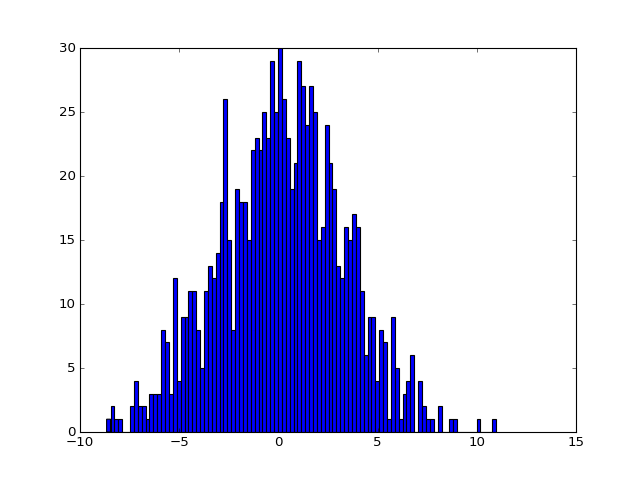

In [9]:
plt.figure('norm distribution')
plt.hist([ np.std(prices_der) * np.random.randn() + np.mean(prices_der) for i in np.arange(1000)], bins=100)
plt.show()

[ 0.07734006]
229.426343718
158.715502711


<IPython.core.display.Javascript object>


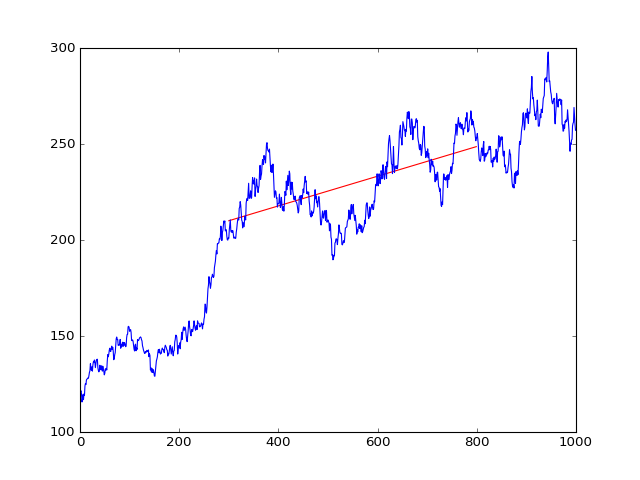

<IPython.core.display.Javascript object>


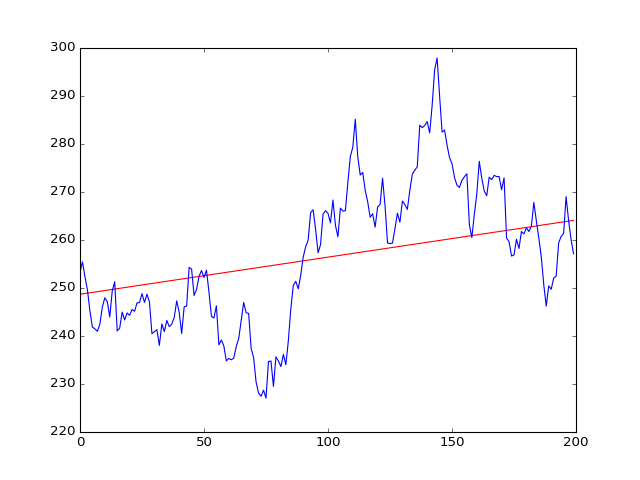

<IPython.core.display.Javascript object>


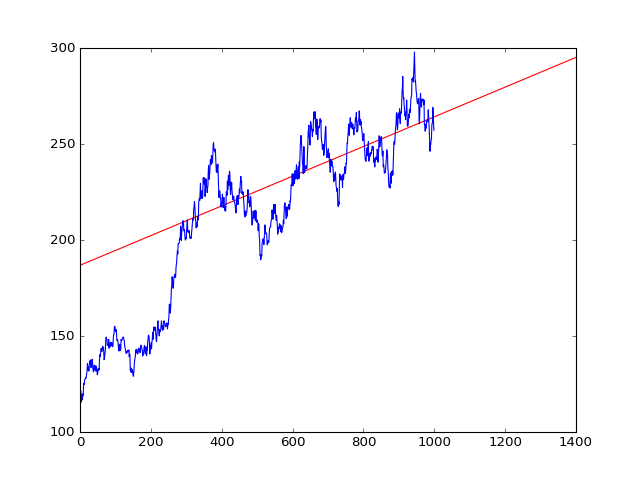

In [10]:
# здесь я пытался построить линейную регрессию по ряду (как прямую линию, так и с 
# фичами гармоник разного периода, подобранного из данных)
from sklearn import linear_model

train_len = 800
start = 300

q = [[k,
      #np.sin(k*2*3.14/300), np.cos(k*2*3.14/300),
      #np.sin(k*2*3.14/200), np.cos(k*2*3.14/200),
      #np.sin(k*2*3.14/100), np.cos(k*2*3.14/140),
      #np.sin(k*2*3.14/100), np.cos(k*2*3.14/110),
      #np.sin(k*2*3.14/100), np.cos(k*2*3.14/100),
      #np.sin(k*2*3.14/100), np.cos(k*2*3.14/90),
      #np.sin(k*2*3.14/100), np.cos(k*2*3.14/80),
      #np.sin(k*2*3.14/50), np.cos(k*2*3.14/50), 
     ] for k in np.arange(start, train_len)]

z = [[k, 
      #np.sin(k*2*3.14/200), np.cos(k*2*3.14/300),
      #np.sin(k*2*3.14/300), np.cos(k*2*3.14/200),
      #np.sin(k*2*3.14/100), np.cos(k*2*3.14/140),
      #np.sin(k*2*3.14/100), np.cos(k*2*3.14/110),
      #np.sin(k*2*3.14/100), np.cos(k*2*3.14/100),
      #np.sin(k*2*3.14/100), np.cos(k*2*3.14/90),
      #np.sin(k*2*3.14/100), np.cos(k*2*3.14/80),
      #np.sin(k*2*3.14/50), np.cos(k*2*3.14/50), 
     ] for k in np.arange(train_len, len(prices))]

b = [[k, 
      #np.sin(k*2*3.14/200), np.cos(k*2*3.14/300),
      #np.sin(k*2*3.14/300), np.cos(k*2*3.14/200),
      #np.sin(k*2*3.14/100), np.cos(k*2*3.14/140),
      #np.sin(k*2*3.14/100), np.cos(k*2*3.14/110),
      #np.sin(k*2*3.14/100), np.cos(k*2*3.14/100),
      #np.sin(k*2*3.14/100), np.cos(k*2*3.14/90),
      #np.sin(k*2*3.14/100), np.cos(k*2*3.14/80), 
      #np.sin(k*2*3.14/50), np.cos(k*2*3.14/50), 
     ] for k in np.arange(1400)]

clf = linear_model.LinearRegression()
clf.fit(q, prices[start:train_len])

print clf.coef_

train_residuals = np.mean([(p-d)**2 for p,d in zip(clf.predict(q), prices[start:train_len+start])])
test_residuals = np.mean([(p-d)**2 for p,d in zip(clf.predict(z), prices[train_len:])])

print train_residuals
print test_residuals

plt.figure('linreg')
plt.plot(np.arange(start,len(prices[start:train_len])+start), clf.predict(q), color='red', linewidth=1)
plt.plot(np.arange(len(prices)), prices)
plt.show()

plt.figure('linreg2')
plt.plot(np.arange(len(prices[train_len:])), clf.predict(z), color='red', linewidth=1)
plt.plot(np.arange(len(prices[train_len:])), prices[train_len:])
plt.show()

plt.figure('linreg3')
plt.plot(np.arange(1400), clf.predict(b), color='red', linewidth=1)
plt.plot(np.arange(len(prices)), prices)
plt.show()

-0.342973860634
12.5935646916


<IPython.core.display.Javascript object>


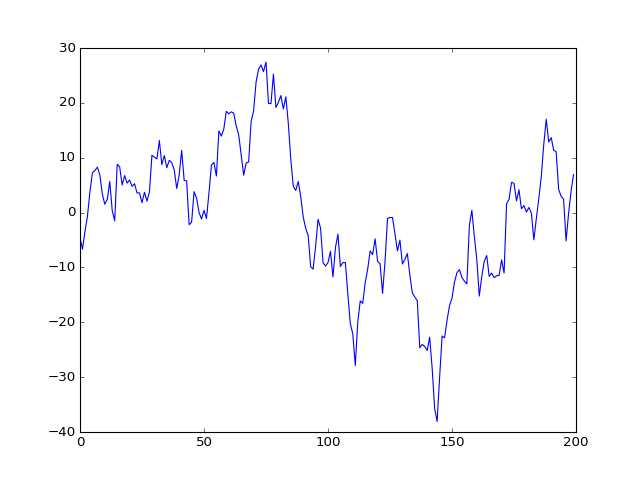

0.057615940938
3.73501018362


In [11]:
#остатки от линейной регрессии прямой линией на тестовом участке
epsilons = [(p-d) for p,d in zip(clf.predict(z), prices[train_len:])]
print np.mean(epsilons)
print np.std(epsilons)
plt.figure('epsilons')
plt.plot(np.arange(len(epsilons)), epsilons)
plt.show()

epsilons_der = np.array([epsilons[i] - epsilons[i-1] for i in np.arange(1, len(epsilons))])
print np.mean(epsilons_der)
print np.std(epsilons_der)

In [12]:
prediction_list = []

# BOOOOOOOTSTRAAAAAAP NOOOOOW 0.0893
for m in np.arange(10000):
    if m % 1000 == 0:
        print m
    predictions = []
    predictions.append(267.)
    for k in np.arange(1, 400):
        noise_i = np.random.randint(0,len(epsilons))
        predictions.append( predictions[-1] + clf.coef_[0] + epsilons[noise_i] )
    prediction_list.append(predictions)

# остатки от линейной модели на тесте все же велики, поэтому бутсреп дает оооочень большой разброс

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


<IPython.core.display.Javascript object>


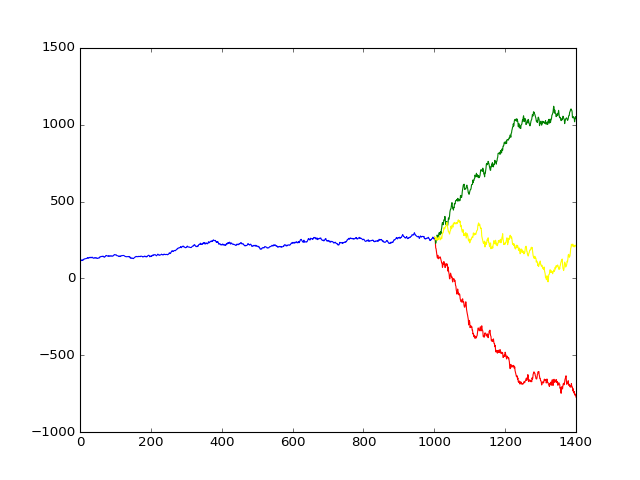

In [13]:
minimum = np.argmin(np.array(prediction_list)[:,-1])
maximum = np.argmax(np.array(prediction_list)[:,-1])


plt.figure('prs')
plt.plot(np.arange(1001, 1401), prediction_list[minimum], color='red')
plt.plot(np.arange(1001, 1401), prediction_list[maximum], color='green')
plt.plot(np.arange(1001, 1401), predictions, color='yellow')
plt.plot(np.arange(len(prices)), prices)
plt.show()

mean 158.126709849
std 252.368146952


<IPython.core.display.Javascript object>


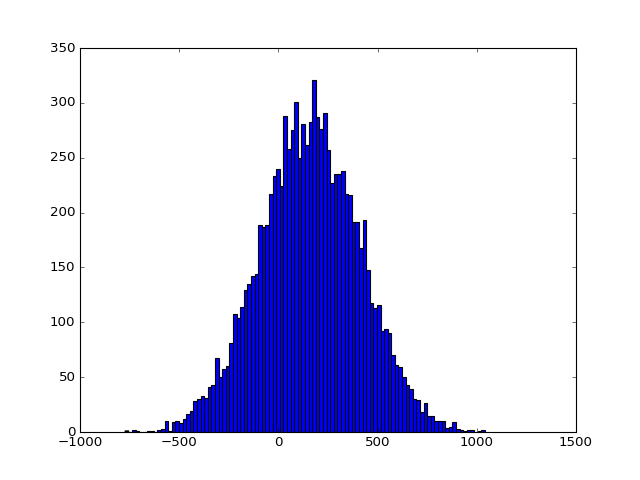

502.5
502.49
502.48
502.47
502.46
502.45
502.44
502.43
502.42
502.41
502.4
502.39
502.38
502.37
502.36
502.35
502.34
502.33
502.32
502.31
502.3
502.29
502.28
502.27
502.26
502.25
502.24
502.23
502.22
502.21
502.2
502.19
502.18
502.17
502.16
502.15
502.14
502.13
502.12
502.11
502.1
502.09
502.08
502.07
502.06
502.05
502.04
502.03
502.02
502.01
502.0
501.99
501.98
501.97
501.96
501.95
501.94
501.93
501.92
501.91
501.9
501.89
501.88
501.87
501.86
501.85
501.84
501.83
501.82
501.81
501.8
501.79
501.78
501.77
501.76
501.75
501.74
501.73
501.72
501.71
501.7
501.69
501.68
501.67
501.66
501.65
501.64
501.63
501.62
501.61
501.6
501.59
501.58
501.57
501.56
501.55
501.54
501.53
501.52
501.51
501.5
501.49
501.48
501.47
501.46
501.45
501.44
501.43
501.42
501.41
501.4
501.39
501.38
501.37
501.36
501.35
501.34
501.33
501.32
501.31
501.3
501.29
501.28
501.27
501.26
501.25
501.24
501.23
501.22
501.21
501.2
501.19
501.18
501.17
501.16
501.15
501.14
501.13
501.12
501.11
501.1
501.09
501.08
501.07
501.06


In [14]:
mas = [prediction_list[i][-1] for i in np.arange(len(prediction_list))]
print 'mean', np.mean(mas)
print 'std', np.std(mas)
plt.figure('400s')
plt.hist(mas, bins = 100)
plt.show()

mean = np.mean(mas)
s = 502.5
while True:
    count = 0.
    print s
    for i in np.arange(len(mas)):
        if mas[i] <= mean + s:
            if mas[i] >= mean - s:
                count +=1
    s -= 0.01
    if count/len(mas) < 0.95:
        break
        
print count/len(mas), s
print '95% values in [{},{}]'.format(mean-2*s,mean+2*s)

In [15]:
from statsmodels.iolib.table import SimpleTable
import statsmodels.api as sm

row =  [u'JB', u'p-value', u'skew', u'kurtosis']
jb_test = sm.stats.stattools.jarque_bera(epsilons)
a = np.vstack([jb_test])
itog = SimpleTable(a, row)
print itog 
# остатки от линейной регрессии похожи на нормальные

      JB         p-value           skew         kurtosis  
----------------------------------------------------------
1.92620831375 0.381706169222 -0.239735888341 2.96461903032
----------------------------------------------------------


In [16]:
#попытка настроить АРИМУ
# 1 раз продифференцированный ряд цен стационарен
test = sm.tsa.adfuller(prices_der)
print 'adf: ', test[0]
print 'p-value: ', test[1]
print'Critical values: ', test[4]
if test[0]> test[4]['5%']: 
    print 'есть единичные корни, ряд не стационарен'
else:
    print 'единичных корней нет, ряд стационарен'

adf:  -23.299024699
p-value:  0.0
Critical values:  {'5%': -2.8644432969122833, '1%': -3.4369259442540416, '10%': -2.5683158550174094}
единичных корней нет, ряд стационарен


<IPython.core.display.Javascript object>


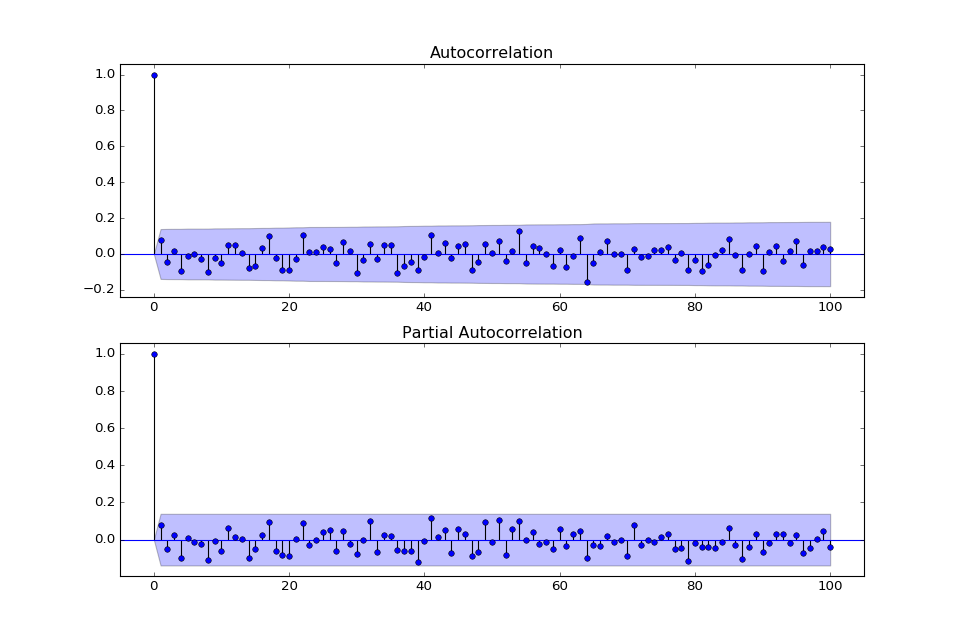

In [17]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(epsilons_der, lags=100, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(epsilons_der, lags=100, ax=ax2)

In [18]:
pr = np.array(prices[:])

model010 = sm.tsa.ARIMA(pr, order=(0, 1, 0)).fit(disp=-1)

In [19]:
model010.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  999
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -2554.146
Method:                           css   S.D. of innovations              3.120
Date:                Thu, 26 Jan 2017   AIC                           5112.293
Time:                        23:39:04   BIC                           5122.106
Sample:                             1   HQIC                          5116.023
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.1377      0.099      1.395      0.163        -0.056     0.331
==============================================================================
"""

1301
1000


<IPython.core.display.Javascript object>


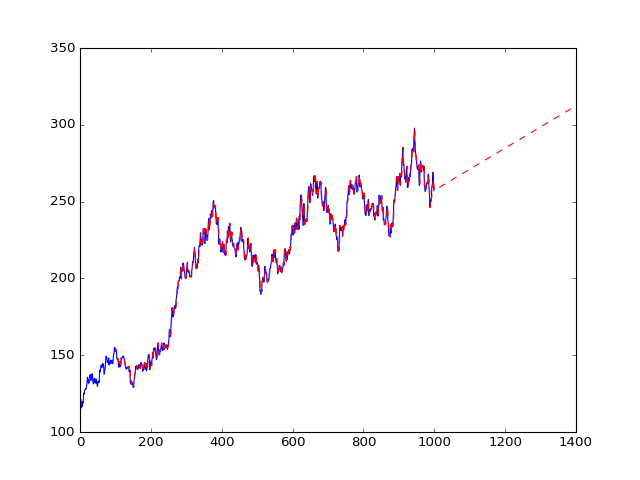

<IPython.core.display.Javascript object>


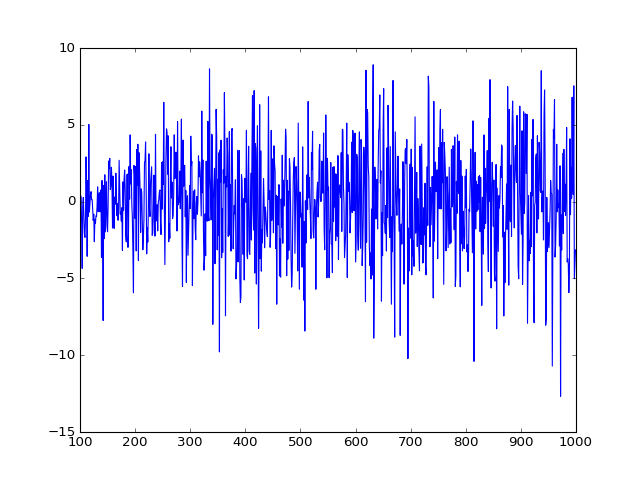

-0.0236742112112
3.21695565941


In [20]:
pred010 = model010.predict(100, 1400, typ='levels')
pred = model010.predict(100, 999, typ='levels')
print len(pred010)
print len(prices)

plt.figure('preds')
plt.plot(np.arange(len(prices)), prices)
plt.plot(np.arange(100, 1401), pred010, 'r--')
plt.show()

plt.figure('residuals')
plt.plot(np.arange(100,1000), prices[100:1000] - pred)
plt.show()

print np.mean(prices[100:1000] - pred)
print np.std(prices[100:1000] - pred)

In [21]:
prediction_list = []

arima_res = prices[100:1000] - pred
# BOOOOOOOTSTRAAAAAAP NOOOOOW 0.0893
for m in np.arange(10000):
    if m % 1000 == 0:
        print m
    predictions = []
    predictions.append(267.)
    for k in np.arange(1, 400):
        noise_i = np.random.randint(0,len(arima_res))
        predictions.append( predictions[-1] + 0.1377 + arima_res[noise_i] )
    prediction_list.append(predictions)

# остатки от линейной модели на тесте все же велики, поэтому бутсреп дает оооочень большой разброс

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


<IPython.core.display.Javascript object>


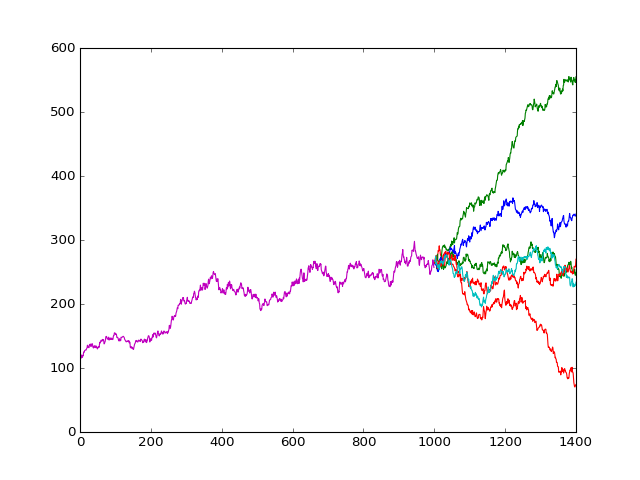

In [22]:
minimum = np.argmin(np.array(prediction_list)[:,-1])
maximum = np.argmax(np.array(prediction_list)[:,-1])


plt.figure('arima_bootstrep')
plt.plot(np.arange(1001, 1401), prediction_list[minimum], color='red')
plt.plot(np.arange(1001, 1401), prediction_list[maximum], color='green')
for i in [np.random.randint(0,10000) for m in np.arange(4)]:
    plt.plot(np.arange(1001, 1401), prediction_list[i])

plt.plot(np.arange(len(prices)), prices)
plt.show()

mean 312.333346253
std 64.5950547208


<IPython.core.display.Javascript object>


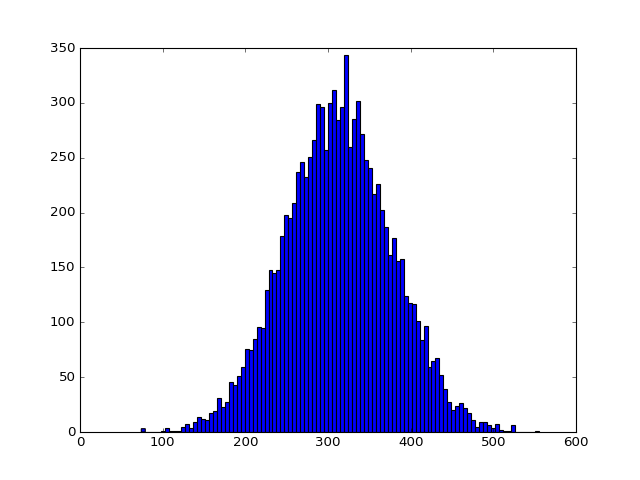

124.75
0.9469 124.74
95% values in [62.8533462534,561.813346253]


In [23]:
mas = [prediction_list[i][-1] for i in np.arange(len(prediction_list))]
print 'mean', np.mean(mas)
print 'std', np.std(mas)
plt.figure('arima_400s')
plt.hist(mas, bins = 100)
plt.show()

mean = np.mean(mas)
s = 124.75
while True:
    count = 0.
    print s
    for i in np.arange(len(mas)):
        if mas[i] <= mean + s:
            if mas[i] >= mean - s:
                count +=1
    s -= 0.01
    if count/len(mas) < 0.95:
        break
        
print count/len(mas), s
print '95% values in [{},{}]'.format(mean-2*s,mean+2*s)

In [24]:
play_mas = []
for i in np.arange(len(mas)):
    if mas[i]>300:
        play_mas.append(mas[i])

<IPython.core.display.Javascript object>


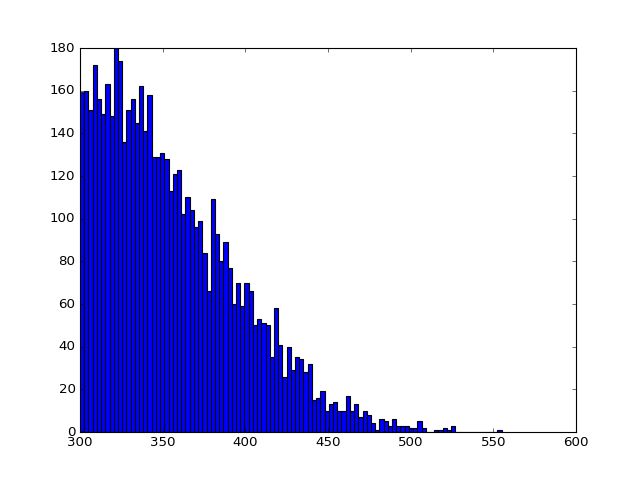

5757


In [25]:
plt.figure('ssss')
plt.hist(play_mas, bins = 100)
plt.show()
print len(play_mas)

In [31]:
delit = 352
for i in np.arange(200):
    print i
    mas1 = []
    mas2 = []
    for j in np.arange(len(play_mas)):
        if play_mas[j] <= delit:
            mas1.append(play_mas[j])
        else:
            mas2.append(play_mas[j])
    s1 = np.sum(mas1) 
    s2 = np.sum(mas2)
    if s1 > s2:
        print s1, s2
        print delit
        break
    delit += 0.01
    print s1, s2

0
1006223.39265 1044654.76311
1
1006223.39265 1044654.76311
2
1006575.41085 1044302.74492
3
1006927.43334 1043950.72243
4
1006927.43334 1043950.72243
5
1006927.43334 1043950.72243
6
1006927.43334 1043950.72243
7
1008335.70011 1042542.45565
8
1008335.70011 1042542.45565
9
1008335.70011 1042542.45565
10
1008335.70011 1042542.45565
11
1008335.70011 1042542.45565
12
1009039.9297 1041838.22607
13
1009039.9297 1041838.22607
14
1009392.06109 1041486.09467
15
1010096.35358 1040781.80219
16
1010448.50507 1040429.65069
17
1010448.50507 1040429.65069
18
1010800.67727 1040077.4785
19
1011152.86656 1039725.28921
20
1011152.86656 1039725.28921
21
1011505.06675 1039373.08901
22
1011505.06675 1039373.08901
23
1011857.28995 1039020.86582
24
1011857.28995 1039020.86582
25
1011857.28995 1039020.86582
26
1012209.54514 1038668.61063
27
1012209.54514 1038668.61063
28
1012209.54514 1038668.61063
29
1012209.54514 1038668.61063
30
1012209.54514 1038668.61063
31
1012561.84733 1038316.30843
32
1012561.84733 1038

In [36]:
bets = np.arange(35, 45, 0.1)
choose_bet = []
for k in np.arange(1000):
    if k % 100 == 0:
        print k
    moneys = []
    for bet in bets:
        money = 0
        for i in np.arange(100):
            money -= bet
            value = mas[np.random.randint(0, len(mas)-1)]
            if value > 300.:
                money += value - 300.
                #print 'BINGOO', value - 300.
            else:
                money += 0.
        moneys.append(money)       
    
    highest_bet = 0.
    for i in np.arange(len(moneys)):
        if moneys[i] > 0:
            highest_bet = bets[i]
        else: pass

    choose_bet.append(highest_bet)

0
100
200
300
400
500
600
700
800
900


40.0554
1.92078911909
I can play this game with bet in [36.2138217618, 43.8969782382] with 95% confidence


<IPython.core.display.Javascript object>


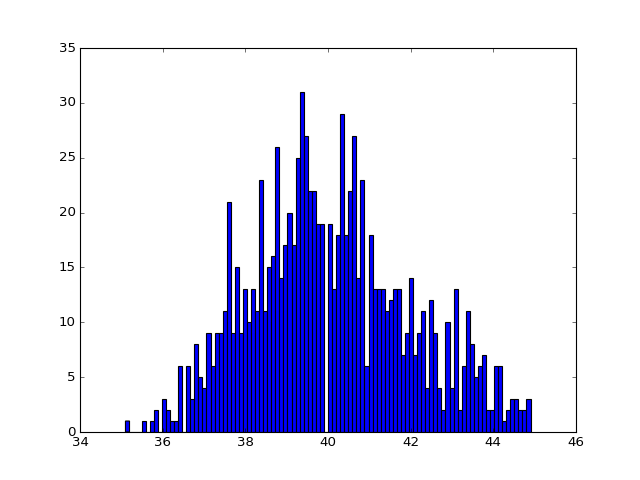

In [37]:
print np.mean(choose_bet)
print np.std(choose_bet)

print 'I can play this game with bet in [{}, {}] with 95% confidence'.format(np.mean(choose_bet)-2*np.std(choose_bet), np.mean(choose_bet)+2*np.std(choose_bet))
plt.figure('bet')
plt.hist(choose_bet, bins=100)
plt.show()